<span style="font-size: 300%;color:white;background:#1155cc"> MASZYNA CCR cvxopt</span>
<span style="font-size: 300%;color:white;background:##ffd966">       wersja 2.4</span> 

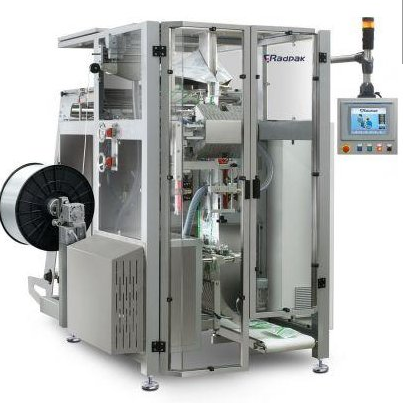

# dalsze eksperymenty nad zrobieniem masowego algorytmu 

In [1]:
import numpy as np
import pandas as pd

BANKI = np.array([[626,466 ,98.7,242,1367,57.2,549,807,1.4,567],
                [13292,8762,5881,5449,51182,346,10560,31455,323,13170],
                [3997,2152,1250,645,40807,367,6939,25380,58,9363],
                [ 531,283,75.5,214,2102,32.9,536,900,14.2,476],
                [9471,5859,1866,3540,17009,529,6761,7756,371,8027],
                [2811,1200,3772,1807,3895,274,1162,5644,5,952]])
                

In [2]:
BANKI

array([[6.2600e+02, 4.6600e+02, 9.8700e+01, 2.4200e+02, 1.3670e+03,
        5.7200e+01, 5.4900e+02, 8.0700e+02, 1.4000e+00, 5.6700e+02],
       [1.3292e+04, 8.7620e+03, 5.8810e+03, 5.4490e+03, 5.1182e+04,
        3.4600e+02, 1.0560e+04, 3.1455e+04, 3.2300e+02, 1.3170e+04],
       [3.9970e+03, 2.1520e+03, 1.2500e+03, 6.4500e+02, 4.0807e+04,
        3.6700e+02, 6.9390e+03, 2.5380e+04, 5.8000e+01, 9.3630e+03],
       [5.3100e+02, 2.8300e+02, 7.5500e+01, 2.1400e+02, 2.1020e+03,
        3.2900e+01, 5.3600e+02, 9.0000e+02, 1.4200e+01, 4.7600e+02],
       [9.4710e+03, 5.8590e+03, 1.8660e+03, 3.5400e+03, 1.7009e+04,
        5.2900e+02, 6.7610e+03, 7.7560e+03, 3.7100e+02, 8.0270e+03],
       [2.8110e+03, 1.2000e+03, 3.7720e+03, 1.8070e+03, 3.8950e+03,
        2.7400e+02, 1.1620e+03, 5.6440e+03, 5.0000e+00, 9.5200e+02]])

<span style="font-size: 200%;color:white;background:#1155cc"> 1 </span>
<span style="font-size: 200%;color:white;background:#a2c4c9">    Mamy sobie taką baze danych z bankami
    
    pierwsze cztery wiersze oznaczają nakłady, ostatnie dwa wiersze oznaczają efekty 

In [3]:
# creating a list of index names
index_values = ['Majątek', 'Wkład', 'Zatrudnienie', 'Koszty', 'Kredyty', 'Należności']
   
# creating a list of column names
column_values = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10']

df = pd.DataFrame(data = BANKI, 
                  index = index_values, 
                  columns = column_values)

In [4]:
df

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
Majątek,626.0,466.0,98.7,242.0,1367.0,57.2,549.0,807.0,1.4,567.0
Wkład,13292.0,8762.0,5881.0,5449.0,51182.0,346.0,10560.0,31455.0,323.0,13170.0
Zatrudnienie,3997.0,2152.0,1250.0,645.0,40807.0,367.0,6939.0,25380.0,58.0,9363.0
Koszty,531.0,283.0,75.5,214.0,2102.0,32.9,536.0,900.0,14.2,476.0
Kredyty,9471.0,5859.0,1866.0,3540.0,17009.0,529.0,6761.0,7756.0,371.0,8027.0
Należności,2811.0,1200.0,3772.0,1807.0,3895.0,274.0,1162.0,5644.0,5.0,952.0


<span style="font-size: 200%;color:white;background:#1155cc"> 2 </span>
<span style="font-size: 200%;color:white;background:#f4cccc">  Liczymy pierwszy bank - tworzymy wektor nakładów
    
    pierwsze cztery wiersze oznaczają nakłady, ostatnie dwa wiersze oznaczają efekty 

In [5]:
BB = 'B7' # <-- TU WPISUJEMY NAZWĘ BANKU, KTÓRY BĘDZIE ANALIZOWANY 
RR = 4   # <-- ILE JEST W BAZIE WIERSZY Z NAKŁADAMI
df  # nazwa bazy danych

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
Majątek,626.0,466.0,98.7,242.0,1367.0,57.2,549.0,807.0,1.4,567.0
Wkład,13292.0,8762.0,5881.0,5449.0,51182.0,346.0,10560.0,31455.0,323.0,13170.0
Zatrudnienie,3997.0,2152.0,1250.0,645.0,40807.0,367.0,6939.0,25380.0,58.0,9363.0
Koszty,531.0,283.0,75.5,214.0,2102.0,32.9,536.0,900.0,14.2,476.0
Kredyty,9471.0,5859.0,1866.0,3540.0,17009.0,529.0,6761.0,7756.0,371.0,8027.0
Należności,2811.0,1200.0,3772.0,1807.0,3895.0,274.0,1162.0,5644.0,5.0,952.0


In [6]:
def matrix(BB,RR,df):
    
    import numpy as np
    from cvxopt import matrix
    from cvxopt import solvers
    
    global x, wynik
    
## ---WEK---------------tworzymy wektor nakładów dla wybranego obiektu---
    WEK = df[BB][:RR]
    WEK = np.array(WEK)  
    WEK = WEK*-1
    mop = np.array([0,0])  
    WEK = np.append(WEK, mop, axis=0) 
## ---KOR---------------tworzymy wektor efektów dla wybranego obiektu----
    KOR = df[BB][RR:]
    KOR = np.array(KOR)  
    KOR = KOR*-1
    ze = np.zeros(4) 
    KOR = np.append(ze,KOR, axis=0)    
## ---NAKŁADY--Tworzymy macierz nakładów dla wszystkich--------------
    NAKŁADY = df[:RR] 
    NAKŁADY = np.array(NAKŁADY)  
    NAKŁADY = NAKŁADY.T
##---EFEKTY--Tworzymy wektor efektów dla wszystkich-------------------
    EFEKTY = df[RR:]
    EFEKTY = np.array(EFEKTY)
    EFEKTY = EFEKTY.T*-1
##---Łączymy MACIERZ efektów i nakładów dla wszystkich----------------
    GN = np.append(NAKŁADY,EFEKTY, axis=1)     
##--Dodajemy do macierzy efe. i nak., wektor specjalny dla wybranego obiektu -------
    WEK = WEK.reshape(1,6) 
    GN = np.append(WEK,GN, axis=0) 
    
##---Macierz warunków znakowych ----------------------------------------
    w,k = GN.shape
    ZERO = np.eye(w-1, k=0, dtype=int) *-1
    w,k = ZERO.shape
    ze = np.zeros(w)
    ze = ze.reshape(1,w)
    ZERO = np.append(ze,ZERO, axis=0) 
    w,k = ZERO.shape
    zk = np.zeros(w)
    
    # Dodajemy wektor z jedynką k
    zk =zk.reshape(w,1)
    GF = np.append(ZERO,zk, axis=1) 
    w, k = GF.shape
    GF[w-1,k-1]=1
### ----OSTATECZNA MACIERZ ----Łączymy wszystkie macierze
    GK = np.append(GN,GF, axis=1) 
    G = GK.tolist()
### ----Tworzę wektor celu c------------------------
    w,k = GK.shape
    C = np.zeros(w)
    C[0]=1
    C = C.tolist()
### ----Tworzę wektor wyników h--------------------
    a = KOR.shape
    nt = k-a[0]
    nv = np.zeros(nt)
    h = np.append(KOR,nv, axis=0) 
    h = h.tolist()
###----------------------------------    
  
    c = matrix(C) ## <== przy Maxymalizacji oba znaki mają być ujemne
    G = matrix(G)
    h = matrix(h)

    solvers.options['show_progress'] = False  ## nie chce oglądać wydruku z obliczeń
    sol = solvers.lp(c, G, h)
    zysk = sol['primal objective']


    #print('Zysk dla ustawień optymalnych: %.0f zł' %-zysk)
    x =np.array(sol['x']).round(3)
    print()
    #print('Macierz wielkości optymalnych: Z3, x1, x2, x3')
    #print()
    #print(x)
    wynik =np.array([x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10]]) 
    print(wynik)
    
    return wynik

In [7]:
matrix('B2',4,df)


[[ 0.797]
 [ 0.   ]
 [ 0.   ]
 [ 0.299]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [14.288]
 [-0.   ]]


array([[ 0.797],
       [ 0.   ],
       [ 0.   ],
       [ 0.299],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [14.288],
       [-0.   ]])

In [8]:
wynik


array([[ 0.797],
       [ 0.   ],
       [ 0.   ],
       [ 0.299],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [14.288],
       [-0.   ]])

In [9]:
def Cohen(BANKI,name):

     
    for e, n in  zip(BANKI,name):
        
        print()
        print(n)
        print("-----------------------------")
        matrix(e,4,df)

        

In [10]:
BANKI = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10']
name = ['Bank Handlowy', 'BRE Bank', 'BIG Bank', 'Citibank', 'PKO BP', 'Bank Gospodarstwa Krajoweg', 'Bank Śląsk', 'PeKaO S.A.', 'Opel Bank', 'Bank Gospodarki Żywnościowej']


In [11]:
Cohen(BANKI,name)


Bank Handlowy
-----------------------------

[[ 0.757]
 [ 0.   ]
 [ 0.   ]
 [ 0.506]
 [ 0.   ]
 [ 0.   ]
 [ 2.952]
 [ 0.   ]
 [ 0.   ]
 [18.775]
 [-0.   ]]

BRE Bank
-----------------------------

[[ 0.797]
 [ 0.   ]
 [ 0.   ]
 [ 0.299]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [14.288]
 [-0.   ]]

BIG Bank
-----------------------------

[[ 1.]
 [-0.]
 [-0.]
 [ 1.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [-0.]]

Citibank
-----------------------------

[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [-0.]]

PKO BP
-----------------------------

[[ 0.336]
 [ 0.   ]
 [ 0.   ]
 [ 0.679]
 [ 0.   ]
 [ 0.   ]
 [ 4.207]
 [ 0.   ]
 [ 0.   ]
 [36.434]
 [ 0.   ]]

Bank Gospodarstwa Krajoweg
-----------------------------

[[ 1.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 1.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]]

Bank Śląsk
-----------------------------

[[ 0.554]
 [ 0.   ]
 [ 0.   ]
 [ 0.072]
 [ 0.   ]
 [ 0.   ]
 [ 2.997]
 [ 0.   ]
 [ 0.   ]
 [13.587]
 [-0.   ]]

PeKaO S.A.


In [12]:
def EWEK(BANKI,name):

    KOT = [] 
    for e in BANKI:
        
        
        result = matrix(e,4,df)
        KOT.append(e)
   

In [13]:
EWEK(BANKI,name)


[[ 0.757]
 [ 0.   ]
 [ 0.   ]
 [ 0.506]
 [ 0.   ]
 [ 0.   ]
 [ 2.952]
 [ 0.   ]
 [ 0.   ]
 [18.775]
 [-0.   ]]

[[ 0.797]
 [ 0.   ]
 [ 0.   ]
 [ 0.299]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [14.288]
 [-0.   ]]

[[ 1.]
 [-0.]
 [-0.]
 [ 1.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [-0.]]

[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [-0.]]

[[ 0.336]
 [ 0.   ]
 [ 0.   ]
 [ 0.679]
 [ 0.   ]
 [ 0.   ]
 [ 4.207]
 [ 0.   ]
 [ 0.   ]
 [36.434]
 [ 0.   ]]

[[ 1.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 1.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]]

[[ 0.554]
 [ 0.   ]
 [ 0.   ]
 [ 0.072]
 [ 0.   ]
 [ 0.   ]
 [ 2.997]
 [ 0.   ]
 [ 0.   ]
 [13.587]
 [-0.   ]]

[[ 0.377]
 [ 0.   ]
 [ 0.   ]
 [ 1.275]
 [ 0.   ]
 [ 0.   ]
 [ 2.861]
 [ 0.   ]
 [ 0.   ]
 [10.415]
 [ 0.   ]]

[[ 1.]
 [-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 1.]
 [-0.]]

[[ 0.647]
 [ 0.   ]
 [ 0.   ]
 [ 0.225]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [20.503]
 [ 0.   ]]


In [14]:
KOT

NameError: name 'KOT' is not defined